In [12]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score 


#import numpy as np
#import matplotlib.pyplot as plt

firstSample = pd.read_csv("a3_first_sample.txt", sep='\t', header=None)
finalTrain = pd.read_csv("a3_train_final.txt", sep='\t', header=None)
finalTest = pd.read_csv("a3_test_final.txt", sep='\t', header=None)

#Shuffle the data
#finalTrain = finalTrain.sample(frac=1.0, random_state=0)
#finalTest = finalTrain.sample(frac=1.0, random_state=0)

##Features 
X_firstSample = firstSample[1]
X_Train = finalTrain[1]
X_Test = finalTest[1]

#Labels
Y_firstSample = firstSample[0]
Y_Train = finalTrain[0]
Y_Test = finalTest[0]

# Split into input part X and output part Y.
X_finalTrain, X_finalTest, Y_finalTrain, Y_finalTest= train_test_split(X_Train, Y_Train, test_size=0.2, random_state=0)
print("Size of X_finalTrain:", X_finalTrain.shape)
print("Size of Y_finalTrain:", Y_finalTrain.shape)
print("Size of X_finalTest:", X_finalTest.shape)
print("Size of Y_finalTest:", Y_finalTest.shape)

num_annotators = Y_Train.value_counts()
print("Number of annotators per asset in Y_Train:")
print(num_annotators)
lengths = finalTrain[0].apply(len)
print("Length of string per row in finalTrain[0]:")
print(lengths)

max_length_index = lengths.idxmax()
print("Row with the maximum number of annotators (index):", max_length_index)
max_length = lengths[max_length_index]
print("Count of annotators in the maximum row:", max_length)

Size of X_finalTrain: (40054,)
Size of Y_finalTrain: (40054,)
Size of X_finalTest: (10014,)
Size of Y_finalTest: (10014,)
Number of annotators per asset in Y_Train:
0
1/1                            19248
0/0                            18221
0/-1                            2434
1/-1                            2082
1/0                             1467
                               ...  
0/1/0/0/0                          1
0/0/1/-1                           1
1/1/1/1/1/1/1/1/1/0/1/1/1/1        1
0/1/0/1/1/0/0/1                    1
1/0/-1/-1                          1
Name: count, Length: 190, dtype: int64
Length of string per row in finalTrain[0]:
0        3
1        4
2        3
3        4
4        3
        ..
50063    3
50064    3
50065    3
50066    3
50067    3
Name: 0, Length: 50068, dtype: int64
Row with the maximum number of annotators (index): 35297
Count of annotators in the maximum row: 113


In [2]:
#Assessing using Logistic Regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

vecTfidf = TfidfVectorizer(max_features=2000, max_df = 0.9, min_df=0.01, lowercase = True )
X_finalTrain_tfidf = vecTfidf.fit_transform(X_finalTrain)
X_Test_tfidf = vecTfidf.transform(X_finalTest)

#Types of Text Classifiers Models 
LRModel = LogisticRegression(max_iter=300)
LRModel.fit(X_finalTrain_tfidf, Y_finalTrain)
Y_TestTfidfLRModel = LRModel.predict(X_Test_tfidf)
accuracy_LRModel = accuracy_score(Y_finalTest, Y_TestTfidfLRModel) 
print("Accuracy:", accuracy_LRModel)



Accuracy: 0.56041541841422


In [10]:
#Assessing using Logistic Regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

vecHash = HashingVectorizer()
X_finalTrain_Hash = vecHash.fit_transform(X_finalTrain)
X_Test_Hash = vecHash.transform(X_finalTest)

#Types of Text Classifiers Models 
LRHashModel = LogisticRegression(max_iter=300)
LRHashModel.fit(X_finalTrain_Hash, Y_finalTrain)
Y_TestHashLRModel = LRHashModel.predict(X_Test_Hash)
accuracy_LRHash = accuracy_score(Y_finalTest, Y_TestHashLRModel) 
print("Accuracy:", accuracy_LRHash)

MemoryError: Unable to allocate 35.2 GiB for an array with shape (4718597680,) and data type float64

In [8]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the SentenceTransformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Reset index to ensure it's contiguous
X_finalTrain.reset_index(drop=True, inplace=True)
X_finalTest.reset_index(drop=True, inplace=True)

# Encode sentences for training and testing
X_train_embeddings = model.encode(X_finalTrain)
X_test_embeddings = model.encode(X_finalTest)

# Train a classifier (Logistic Regression)
LRBert = LogisticRegression(max_iter=1000)
LRBert.fit(X_train_embeddings, Y_finalTrain)

# Predict on the test set
Y_pred = LRBert.predict(X_test_embeddings)

# Calculate accuracy
accuracy_BERT = accuracy_score(Y_finalTest, Y_pred)
print("Accuracy:", accuracy_BERT)


KeyboardInterrupt: 

In [13]:
#Trivial Baseline Comparison of Chosen Vectoriser --> Dummy Classifer to TdIdf Vectoriser
vecTfidf = TfidfVectorizer()
#Vectorising the Training Data
vecCount = CountVectorizer()
vecTfidf = TfidfVectorizer()
vecHash = HashingVectorizer()

Y_finalTrain = finalTrain[0]
X_finalTrain_count= vecCount.fit_transform(X_finalTrain)
X_finalTrain_tfidf = vecTfidf.fit_transform(X_finalTrain)
X_finalTrain_hash = vecHash.fit_transform(X_finalTrain)

#Fiting the Dummy Classifier to the TdIdf Vectoriser
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_finalTrain_tfidf, Y_finalTrain)
Y_tfidfCLF=dummy_clf.predict(X_finalTest)
print(accuracy_score(Y_finalTest, Y_tfidfCLF))


ValueError: Found input variables with inconsistent numbers of samples: [40054, 50068]

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



c:\Users\3742\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\3742\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\3742\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

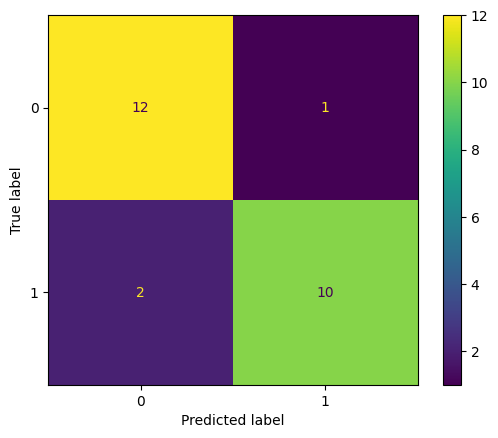

In [22]:
#### CHECKING THE ACCURACY OF THE MODEL USING THE CONFUSION MATRIX
#Initiating the confusion matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

### Displaying the confusion matrix
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()
 

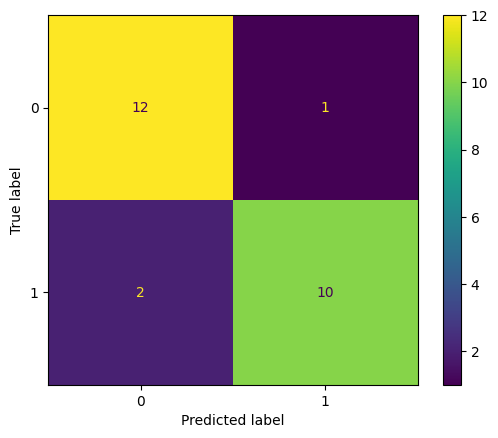